In [106]:
#visualising the first 10 rows of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
data_dir=('https://raw.githubusercontent.com/kodzanayiG/Mat-Model/main/winequality-white.csv')
df = pd.read_csv(data_dir)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [107]:

#checking the dataset shape so we can see the number of rows and columns
df.shape

(4898, 12)

In [108]:

# an overview of statistical data of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [109]:
#Replace spaces with _ for each column
df.columns = df.columns.str.replace(' ', '_')

In [110]:
#checking there are no missing values and no object data types
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [111]:
# splitting the data into testing and training set
from sklearn.model_selection import train_test_split
quality = df['quality']
features = df.drop(['quality'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, quality, test_size=0.2, random_state = 10)
#% of training set
print('Train: ', len(X_train)/len(features))
# % of test data
X_test.shape[0]/features.shape[0]

Train:  0.7999183340138832


0.2000816659861168

In [112]:
#scaling our test and train set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [113]:

#building the multiple linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [114]:

#predicting the test set values
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Actual vs. Predicted')

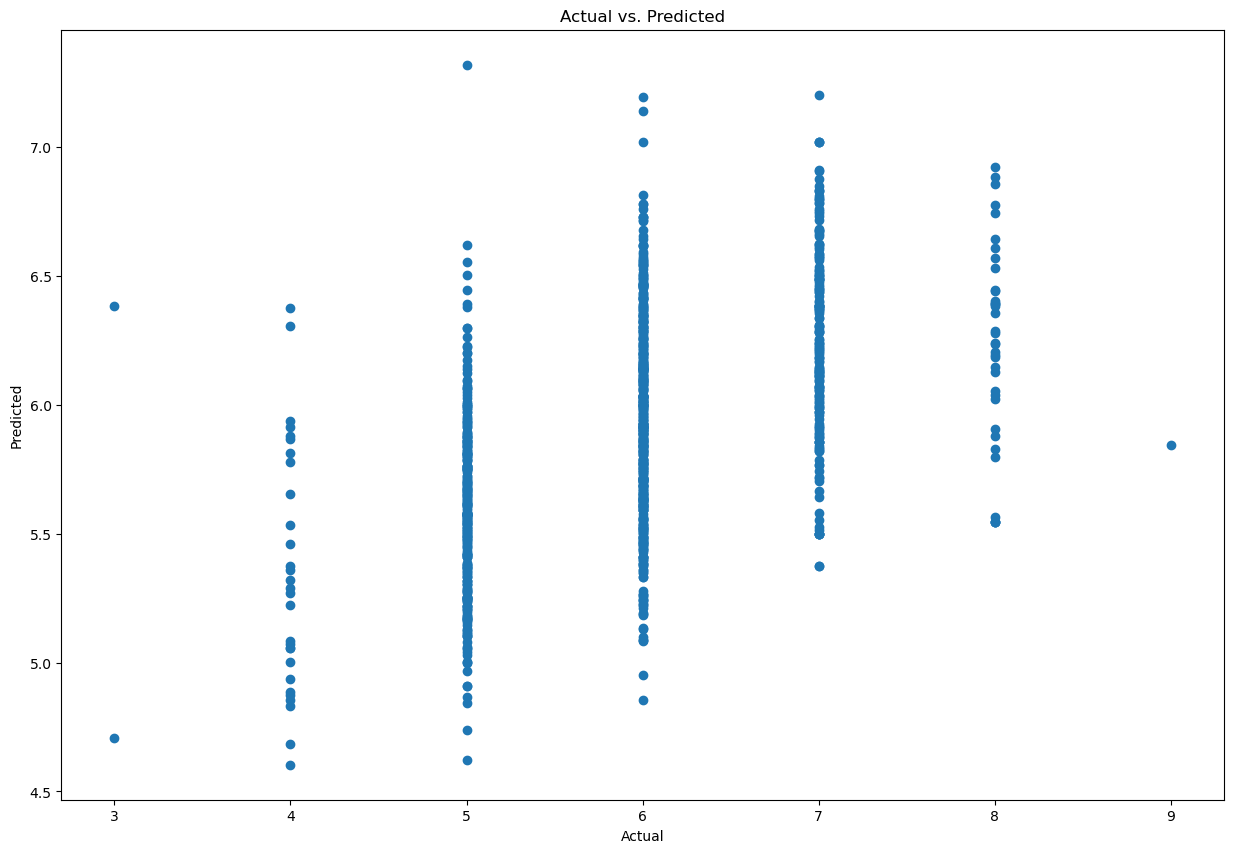

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

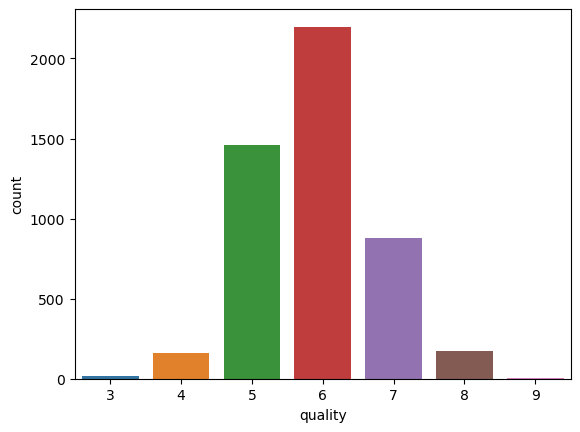

In [116]:
#visualizing the different quality values and how many wines have that rating in our dataset
import seaborn as sns
sns.countplot(df['quality'])
df['quality'].value_counts()

In [117]:
#Calculate and order correlations
correlations = df.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free_sulfur_dioxide     0.008158
citric_acid            -0.009209
residual_sugar         -0.097577
fixed_acidity          -0.113663
total_sulfur_dioxide   -0.174737
volatile_acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


<AxesSubplot:>

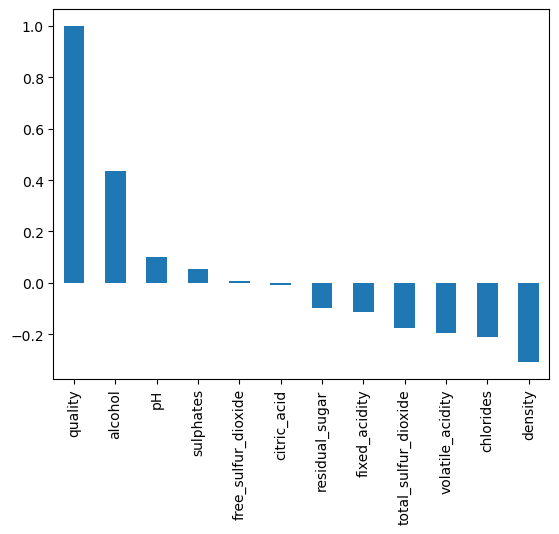

In [118]:
correlations.plot(kind='bar')

<AxesSubplot:>

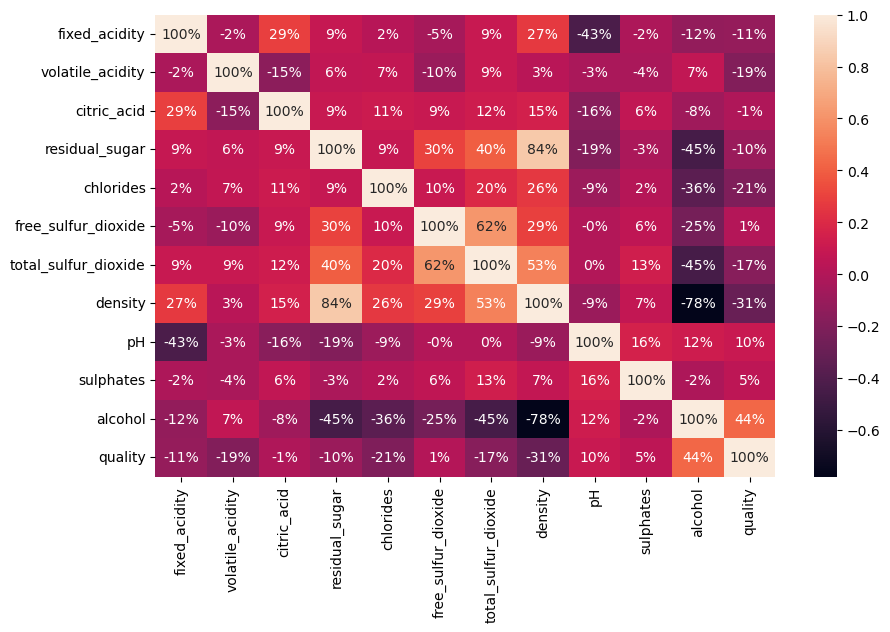

In [119]:
#Heatmap to plot all correlations between features
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [120]:
print(abs(correlations) > 0.2)

quality                  True
alcohol                  True
pH                      False
sulphates               False
free_sulfur_dioxide     False
citric_acid             False
residual_sugar          False
fixed_acidity           False
total_sulfur_dioxide    False
volatile_acidity        False
chlorides                True
density                  True
Name: quality, dtype: bool


[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

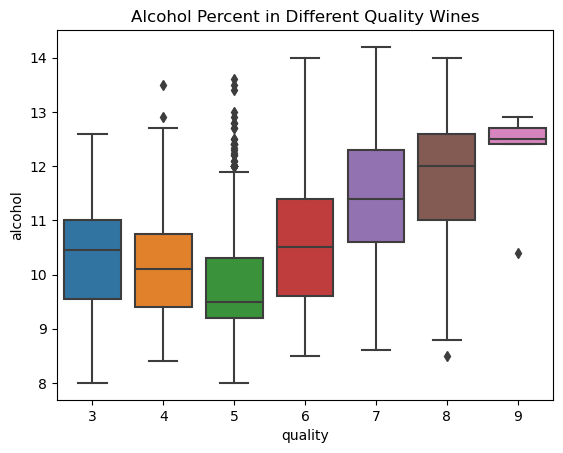

In [121]:

bp = sns.boxplot(x='quality',y='alcohol', data=df)
bp.set(title="Alcohol Percent in Different Quality Wines")

In [122]:
df_quality_five_six = df.loc[(df['quality'] >= 5) & (df['quality'] <= 6)]
df_quality_five_six['quality'].value_counts()

6    2198
5    1457
Name: quality, dtype: int64

In [123]:
correlations_subset = df_quality_five_six.corr()['quality'].sort_values(ascending=False)
print(correlations_subset)

quality                 1.000000
alcohol                 0.339987
pH                      0.065685
sulphates               0.040497
citric_acid             0.001423
free_sulfur_dioxide    -0.022859
fixed_acidity          -0.056204
residual_sugar         -0.083344
chlorides              -0.133260
total_sulfur_dioxide   -0.157961
volatile_acidity       -0.213074
density                -0.218774
Name: quality, dtype: float64


[Text(0.5, 1.0, 'Sulphates in Different Quality Wines')]

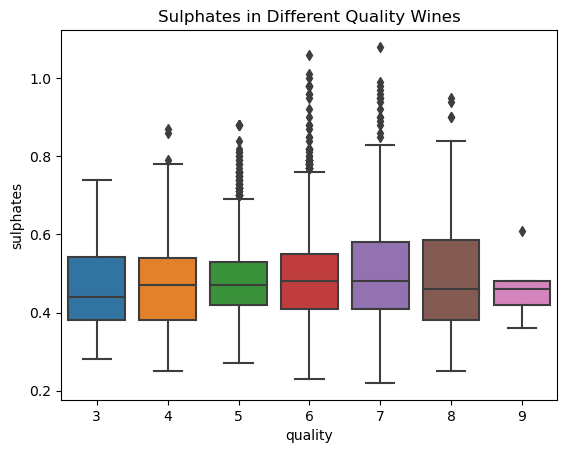

In [124]:
bp = sns.boxplot(x='quality',y='sulphates', data=df)
bp.set(title="Sulphates in Different Quality Wines")

[Text(0.5, 1.0, 'Citric Acid in Different Quality Wines')]

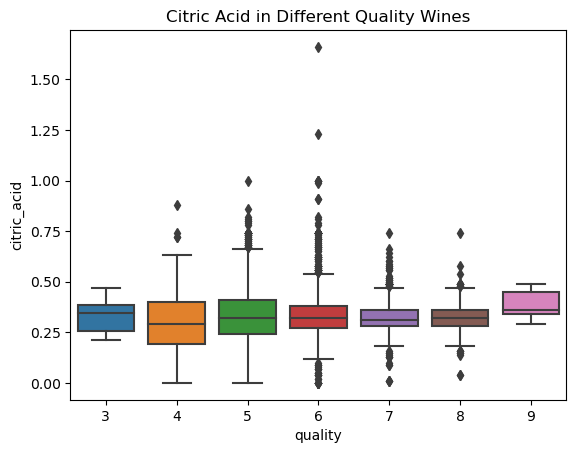

In [125]:
bp = sns.boxplot(x='quality',y='citric_acid', data=df)
bp.set(title="Citric Acid in Different Quality Wines")

[Text(0.5, 1.0, 'Acetic Acid Presence in Different Quality Wines')]

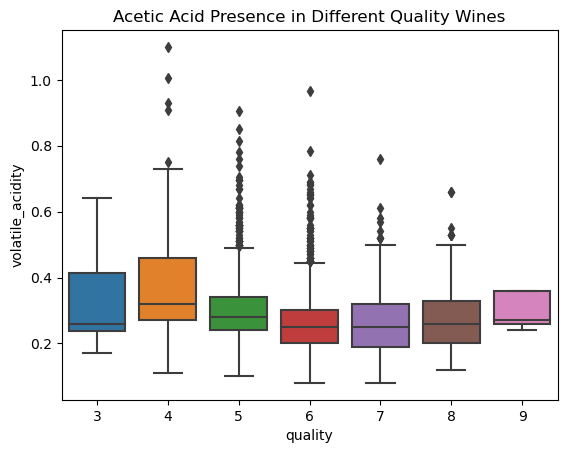

In [126]:
bp = sns.boxplot(x='quality',y='volatile_acidity', data=df)
bp.set(title="Acetic Acid Presence in Different Quality Wines")

In [127]:
#We make a copy of our dataframe and group quality in differnt groups
df_aux = df.copy()
df_aux['quality'].replace([3,4],['low','low'],inplace=True)
df_aux['quality'].replace([5,6],['med','med'],inplace=True)
df_aux['quality'].replace([7,8],['high','high'],inplace=True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

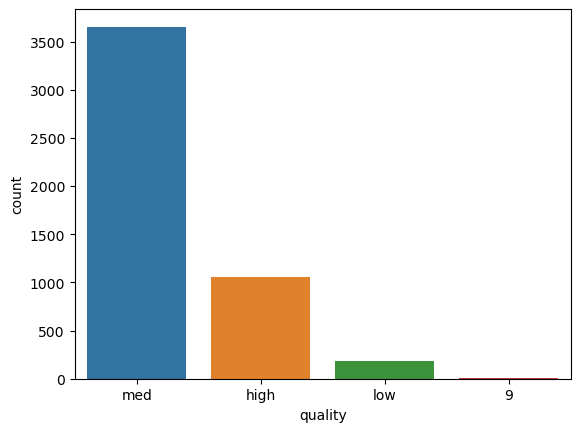

In [128]:

sns.countplot(df_aux['quality'])

In [129]:
#We separe our features from our target feature (quality) and we split data intro training and test
X = df.loc[:,['alcohol','sulphates','citric_acid','volatile_acidity']]
Y = df.iloc[:,11]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=54)

In [130]:
#Fitting the model to make prediction
model = LinearRegression()
model.fit(X_train, y_train)
y_prediction_lr = model.predict(X_test)
y_prediction_lr = np.round(y_prediction_lr)

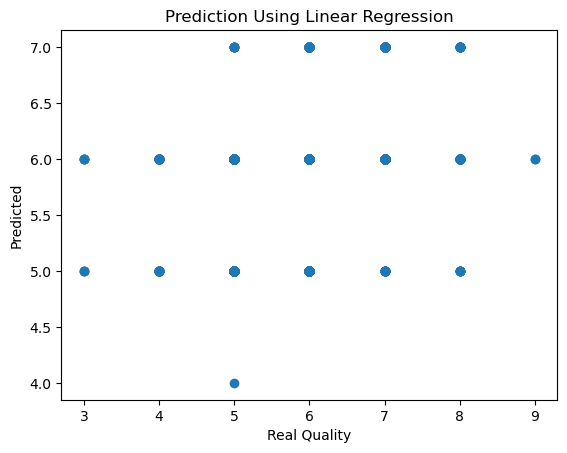

In [131]:

plt.scatter(y_test,y_prediction_lr)
plt.title("Prediction Using Linear Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

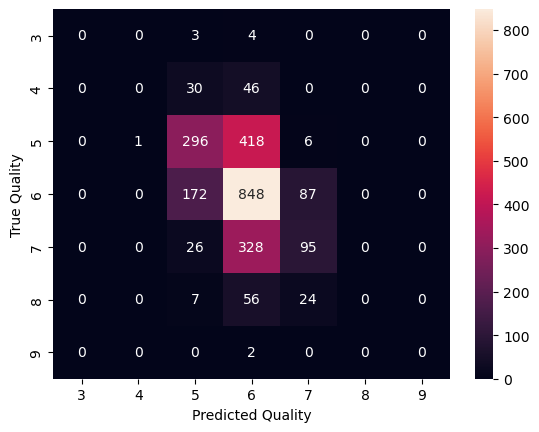

In [132]:
#Confussion Matrix for the Linear Regression Model
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
label_aux = plt.subplot()
cm_linear_regression = confusion_matrix(y_test,y_prediction_lr)
cm_lr = pd.DataFrame(cm_linear_regression,
 index = ['3','4','5','6','7','8','9'],
 columns = ['3','4','5','6','7','8','9'])
sns.heatmap(cm_lr,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

Лабораторная работа 2

In [216]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [218]:
wine = pd.read_csv('https://raw.githubusercontent.com/kodzanayiG/Mat-Model/main/winequality-white.csv')

wine # display the first and last 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Models

In [223]:
# our options: 'most_frequent', 'stratified', 'uniform', 'constant', 'prior')
# I chose the best dummy classifier from all those options (please, believe me)

dm = DummyClassifier(strategy='most_frequent', random_state=0)
# random_state = 0 assure the result will be the same every time we run the model (no random results)
dm.fit(X_train,y_train) # training the model
dm

DummyClassifier(random_state=0, strategy='most_frequent')

In [224]:
y_pred = dm.predict(X_test) # predict the result

In [225]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.97      1.00      0.99      1190

    accuracy                           0.97      1225
   macro avg       0.49      0.50      0.49      1225
weighted avg       0.94      0.97      0.96      1225



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CLASS PREDICTION

Text(47.25, 0.5, 'Actual')

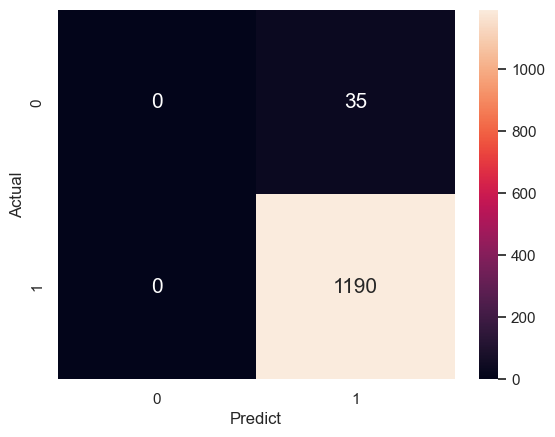

In [226]:
cm_dm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual") #up and right = FP , down and right = FN

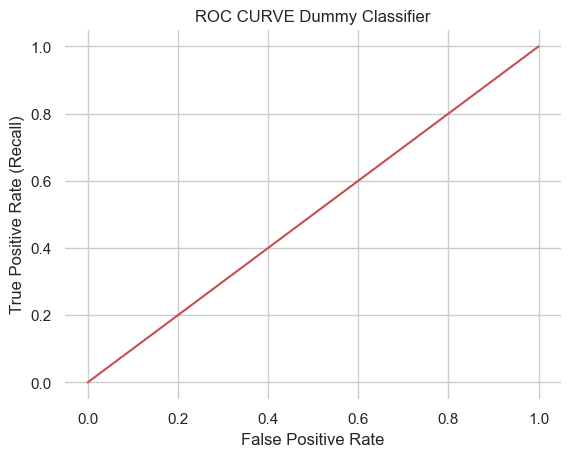

The score for the ROC Curve is: 50.0%


In [228]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc), color='r')
plt.box(False)
plt.title('ROC CURVE Dummy Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

dummy_auc = round(auc,3)*100
 
print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

In [229]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn

KNeighborsClassifier()

In [231]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.06      0.10        35
           1       0.97      1.00      0.99      1190

    accuracy                           0.97      1225
   macro avg       0.74      0.53      0.54      1225
weighted avg       0.96      0.97      0.96      1225



In [232]:
k_range = list(range(3,51)) # we will test k values in range 3-50
weight_op = ['uniform', 'distance'] # we will test the knn methods uniform & distance
d = {'n_neighbors' :k_range, 'weights': weight_op}

Text(47.25, 0.5, 'Actual')

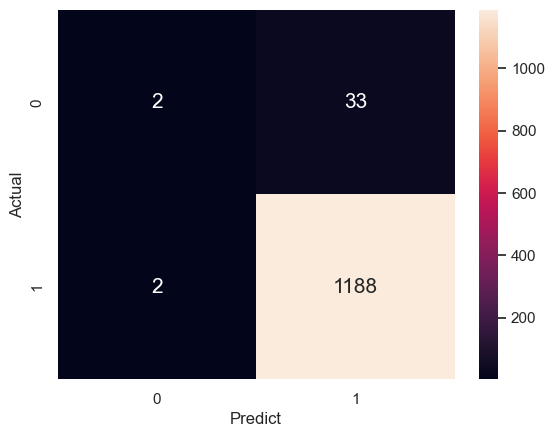

In [234]:
cm_knn = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_knn,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual") #up and right = FP , down and right = FN

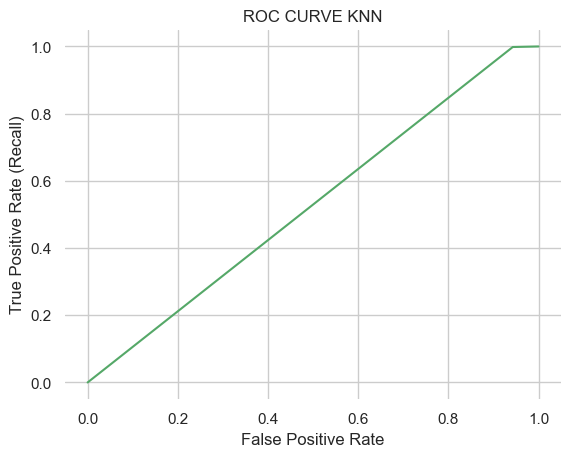

The score for the ROC Curve is: 52.800000000000004%


In [235]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc= roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc), color='g')
plt.box(False)
plt.title('ROC CURVE KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

knn_auc = round(auc,3)*100

print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

In [236]:
dct = DecisionTreeClassifier(random_state=0) # gini and best are the default
dct = dct.fit(X_train,y_train)
dct

DecisionTreeClassifier(random_state=0)

In [237]:
y_pred = dct.predict(X_test)

In [238]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.29      0.40      0.33        35
           1       0.98      0.97      0.98      1190

    accuracy                           0.95      1225
   macro avg       0.63      0.69      0.65      1225
weighted avg       0.96      0.95      0.96      1225



In [239]:
path = dct.cost_complexity_pruning_path(X_train,y_train)
alphas = path.ccp_alphas
impurities = path.impurities
# it returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process
alphas

array([0.        , 0.00017718, 0.00017995, 0.00018024, 0.00018072,
       0.00024201, 0.00024503, 0.00025411, 0.00025713, 0.00025988,
       0.00026091, 0.00026091, 0.00026401, 0.00026672, 0.00026768,
       0.00026779, 0.00026787, 0.00026813, 0.00027343, 0.00027377,
       0.00027424, 0.000276  , 0.00032408, 0.0003261 , 0.00034003,
       0.00035691, 0.00036301, 0.00036301, 0.00036301, 0.00036301,
       0.00036301, 0.0004035 , 0.00040839, 0.00040839, 0.00043561,
       0.00045376, 0.00045376, 0.00046074, 0.00046673, 0.00046673,
       0.00047465, 0.00048008, 0.00050199, 0.00050263, 0.00052026,
       0.00052157, 0.00052507, 0.00056618, 0.00057413, 0.00062089,
       0.00072602, 0.00074538, 0.00075627, 0.00080119, 0.00083561,
       0.00083803, 0.00086574, 0.00087122, 0.00089611, 0.00091887,
       0.0009434 , 0.00115029, 0.00132429, 0.0021535 , 0.00261681,
       0.00628395])

In [240]:
d = {'ccp_alpha':alphas}
d

{'ccp_alpha': array([0.        , 0.00017718, 0.00017995, 0.00018024, 0.00018072,
        0.00024201, 0.00024503, 0.00025411, 0.00025713, 0.00025988,
        0.00026091, 0.00026091, 0.00026401, 0.00026672, 0.00026768,
        0.00026779, 0.00026787, 0.00026813, 0.00027343, 0.00027377,
        0.00027424, 0.000276  , 0.00032408, 0.0003261 , 0.00034003,
        0.00035691, 0.00036301, 0.00036301, 0.00036301, 0.00036301,
        0.00036301, 0.0004035 , 0.00040839, 0.00040839, 0.00043561,
        0.00045376, 0.00045376, 0.00046074, 0.00046673, 0.00046673,
        0.00047465, 0.00048008, 0.00050199, 0.00050263, 0.00052026,
        0.00052157, 0.00052507, 0.00056618, 0.00057413, 0.00062089,
        0.00072602, 0.00074538, 0.00075627, 0.00080119, 0.00083561,
        0.00083803, 0.00086574, 0.00087122, 0.00089611, 0.00091887,
        0.0009434 , 0.00115029, 0.00132429, 0.0021535 , 0.00261681,
        0.00628395])}

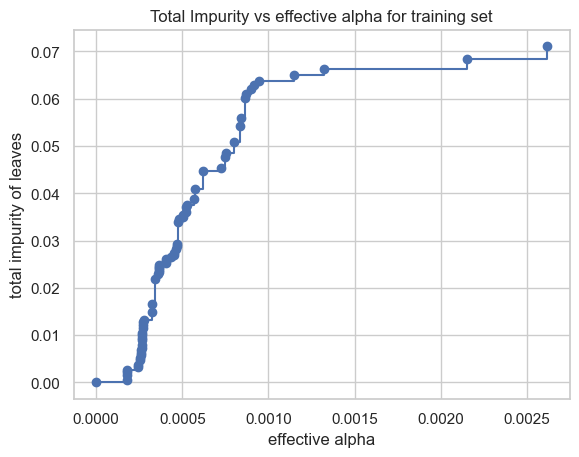

In [241]:
fig, ax = plt.subplots()
ax.plot(alphas[:-1], impurities[:-1], marker = 'o', drawstyle = "steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set");
#  as alpha increases, more of the tree is pruned, which increases the total impurity of its leaves

In [243]:
dct = DecisionTreeClassifier(ccp_alpha = 0.0004761904761904761)
dct = dct.fit(X_train, y_train)
dct

DecisionTreeClassifier(ccp_alpha=0.0004761904761904761)

In [244]:
y_pred = dct.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [245]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.23      0.27        35
           1       0.98      0.99      0.98      1190

    accuracy                           0.96      1225
   macro avg       0.66      0.61      0.63      1225
weighted avg       0.96      0.96      0.96      1225



Text(47.25, 0.5, 'Actual')

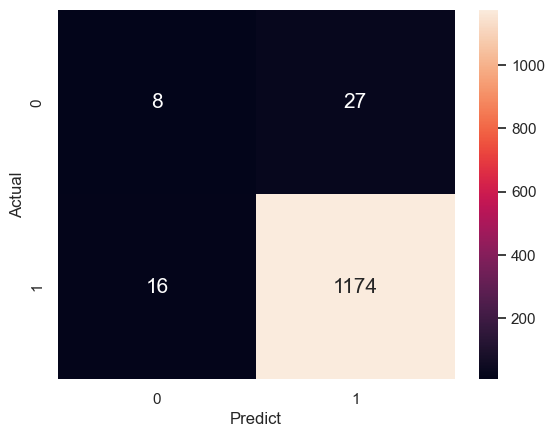

In [246]:
cm_dct = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dct,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual") #up and right = FP , down and right = FN

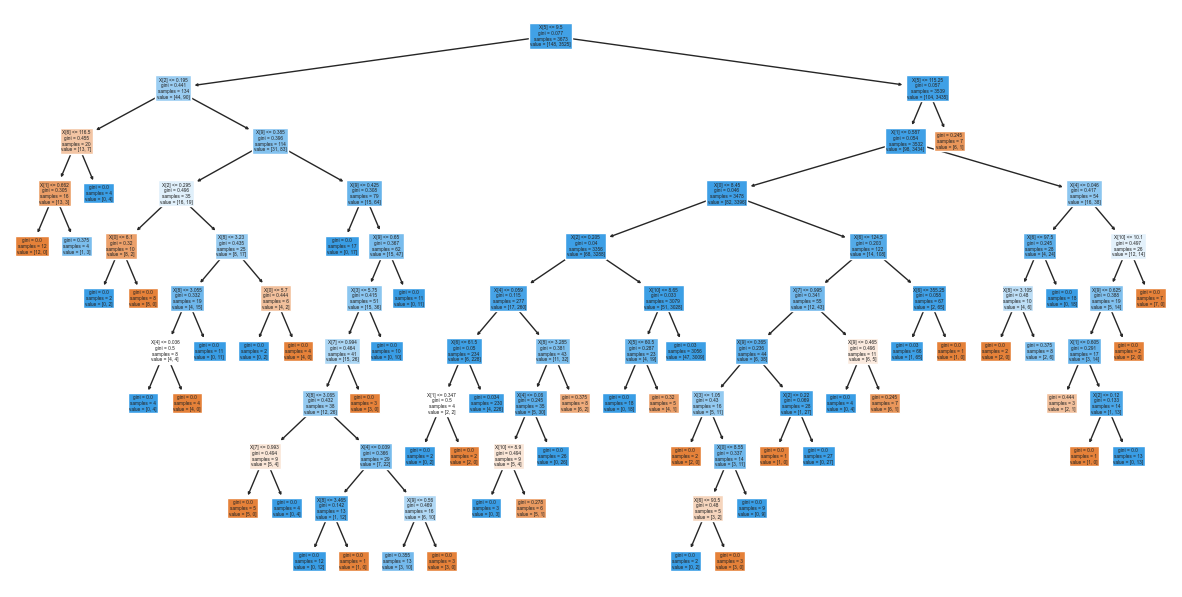

In [247]:
plt.figure(figsize=(15,7.5))
plot_tree(dct,filled=True);

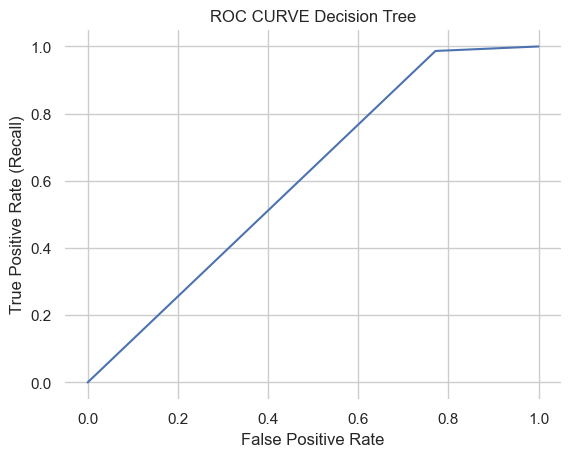

The score for the ROC Curve is: 60.8%


In [248]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc= roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc), color='b')
plt.box(False)
plt.title('ROC CURVE Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

dct_auc = round(auc,3)*100
 
print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

In [249]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [250]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        35
           1       0.97      1.00      0.99      1190

    accuracy                           0.97      1225
   macro avg       0.99      0.51      0.52      1225
weighted avg       0.97      0.97      0.96      1225



Text(47.25, 0.5, 'Actual')

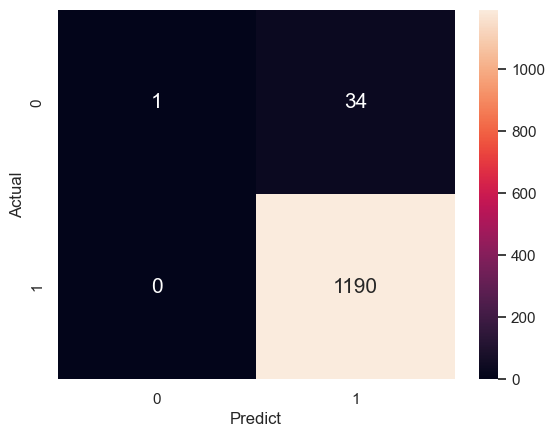

In [251]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual") #up and right = FP , down and right = FN

In [252]:
print(metrics.accuracy_score(y_test, predictions))

0.9722448979591837


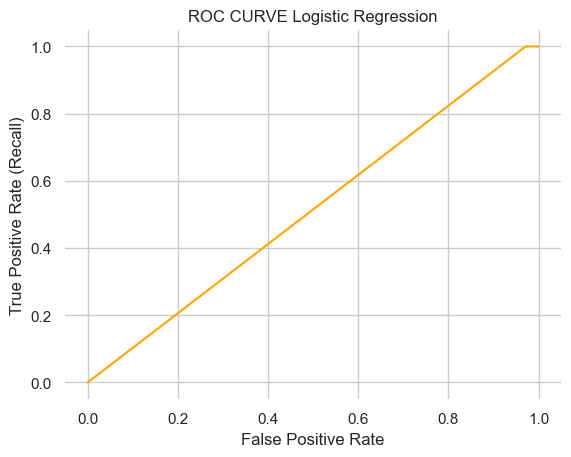

The score for the ROC Curve is: 51.4%


In [253]:
fpr, tpr, _= roc_curve(y_test, predictions)
auc= roc_auc_score(y_test, predictions)
plt.plot(fpr, tpr, label="auc="+str(auc), color='orange')
plt.box(False)
plt.title('ROC CURVE Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

lr_auc = round(auc,3)*100
 
print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

In [254]:
print("The score for the models:\n")
print("Dummy Classifer:      ",dummy_auc,"%")
print("KNN:                  ",knn_auc,"%")
print("Decision Tree:        ",dct_auc,"%")
print("Logistic Regression:  ",lr_auc,"%")

The score for the models:

Dummy Classifer:       50.0 %
KNN:                   52.800000000000004 %
Decision Tree:         60.8 %
Logistic Regression:   51.4 %
